## Random Forest Model Design

This is the Python source code used to build the Random Forest model. It is done using Jupyter Notebook.

First, I import all the required modules and libraries.

In [241]:
%matplotlib inline
import pandas as pd
import sys
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In the next step, data is read from a CSV file, and a sample of 10 first rows are displayed. And the shape of the data is shown. Finally, basic statistics from the dataset are displayed.

In [242]:
# Reading the data from CSV file
data = pd.read_csv("Random_Forest_data_clean.csv", header=0, sep=',')

In [243]:
#A few rows of data are displayed
data.head(10)

,ROW_NUMBER,SUBGROUP,AVG_SPENDING,TARGET_SPENDING,AVG_CALL_COUNT,AVG_CALL_DUR,AVG_ACCT_BAL_BEFORE_CALL,AVG_RECHARGE_AMT,AVG_ACCT_BAL_BEFORE_RECHARGE,LABEL
0,1,2,129.74,195,8.68,23.22,219.24,208.94,60.40,0
1,2,1,22.51,28,10.83,25.91,258.34,2348.37,37.77,1
2,3,2,359.96,540,4.89,141.66,160.36,1640.49,30.69,0
3,4,2,177.73,267,3.15,78.84,73.03,301.42,8.22,0
4,5,3,226.23,452,21.10,82.68,290.83,2245.73,7.57,1
5,6,3,394.08,788,6.83,471.90,296.97,1868.80,43.08,1
6,7,1,151.78,190,16.26,200.52,25.54,2369.45,11.94,1
7,8,3,255.32,511,2.97,127.99,51.84,283.96,56.91,0
8,9,2,323.24,485,28.38,32.04,296.54,1382.15,45.28,1
9,10,3,399.23,798,9.06,18.49,311.73,2027.96,57.94,1


In [244]:
print("The shape of the data is:", data.shape)

The shape of the data is: (30000, 10)


In [245]:
# Basic statistics of the dataset
data.describe()

,ROW_NUMBER,SUBGROUP,AVG_SPENDING,TARGET_SPENDING,AVG_CALL_COUNT,AVG_CALL_DUR,AVG_ACCT_BAL_BEFORE_CALL,AVG_RECHARGE_AMT,AVG_ACCT_BAL_BEFORE_RECHARGE,LABEL
count,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,2.00000,240.060581,379.939033,14.266211,116.861984,184.331443,1827.583227,35.464034,0.548467
std,8660.398374,0.81651,125.204707,215.547146,8.260074,100.909621,103.554421,1027.716849,20.499472,0.497654
min,1.000000,1.00000,2.850000,4.000000,1.000000,2.030000,5.000000,50.250000,0.000000,0.000000
25%,7500.750000,1.00000,135.530000,206.000000,7.840000,45.820000,94.360000,937.835000,17.707500,0.000000
50%,15000.500000,2.00000,235.340000,361.000000,12.850000,88.130000,184.735000,1829.780000,35.360000,1.000000
75%,22500.250000,3.00000,343.295000,526.000000,19.102500,157.425000,273.915000,2721.542500,53.232500,1.000000
max,30000.000000,3.00000,585.500000,1167.000000,59.140000,933.960000,363.990000,3600.940000,70.990000,1.000000


In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ROW_NUMBER                    30000 non-null  int64  
 1   SUBGROUP                      30000 non-null  int64  
 2   AVG_SPENDING                  30000 non-null  float64
 3   TARGET_SPENDING               30000 non-null  int64  
 4   AVG_CALL_COUNT                30000 non-null  float64
 5   AVG_CALL_DUR                  30000 non-null  float64
 6   AVG_ACCT_BAL_BEFORE_CALL      30000 non-null  float64
 7   AVG_RECHARGE_AMT              30000 non-null  float64
 8   AVG_ACCT_BAL_BEFORE_RECHARGE  30000 non-null  float64
 9   LABEL                         30000 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


The below generates summaries for purchasers only.

In [247]:
# Analysing Purchasers alone
purchasers = data[data['LABEL'] == 1]
purchasers.describe()

,ROW_NUMBER,SUBGROUP,AVG_SPENDING,TARGET_SPENDING,AVG_CALL_COUNT,AVG_CALL_DUR,AVG_ACCT_BAL_BEFORE_CALL,AVG_RECHARGE_AMT,AVG_ACCT_BAL_BEFORE_RECHARGE,LABEL
count,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.0
mean,14438.224444,1.921721,240.177131,372.460921,15.527091,144.214037,218.775348,1830.610416,35.463470,1.0
std,8691.320603,0.811138,125.001888,209.909634,9.122375,114.341867,105.139350,1024.793075,20.529419,0.0
min,2.000000,1.000000,2.850000,4.000000,1.030000,2.050000,5.000000,50.450000,0.000000,1.0
25%,6921.000000,1.000000,136.730000,204.000000,8.250000,56.080000,128.810000,942.247500,17.750000,1.0
50%,13926.500000,2.000000,236.410000,355.500000,13.760000,115.610000,250.965000,1838.030000,35.310000,1.0
75%,21983.750000,3.000000,343.007500,514.000000,21.140000,202.685000,308.287500,2724.057500,53.177500,1.0
max,29999.000000,3.000000,585.500000,1154.000000,59.140000,933.960000,363.990000,3600.920000,70.990000,1.0


The below generates summaries for non-purchasers only

In [248]:
# Analysing Non-Purchasers alone
non_purchasers = data[data['LABEL'] == 0]
non_purchasers.describe()

,ROW_NUMBER,SUBGROUP,AVG_SPENDING,TARGET_SPENDING,AVG_CALL_COUNT,AVG_CALL_DUR,AVG_ACCT_BAL_BEFORE_CALL,AVG_RECHARGE_AMT,AVG_ACCT_BAL_BEFORE_RECHARGE,LABEL
count,13546.000000,13546.000000,13546.000000,13546.000000,13546.000000,13546.000000,13546.000000,13546.000000,13546.000000,13546.0
mean,15683.482578,2.095083,239.919010,389.022516,12.734650,83.638103,142.493261,1823.906173,35.464719,0.0
std,8573.548703,0.812941,125.455094,221.871616,6.763866,68.254931,84.444022,1031.283037,20.463793,0.0
min,1.000000,1.000000,3.220000,4.000000,1.000000,2.030000,5.120000,50.250000,0.000000,0.0
25%,8342.500000,1.000000,134.472500,209.000000,7.360000,38.000000,72.522500,930.662500,17.630000,0.0
50%,16163.000000,2.000000,234.170000,366.000000,11.920000,69.240000,137.520000,1822.085000,35.445000,0.0
75%,23014.750000,3.000000,343.707500,539.000000,17.130000,111.790000,204.605000,2715.475000,53.310000,0.0
max,30000.000000,3.000000,583.430000,1167.000000,58.100000,809.140000,363.870000,3600.940000,70.990000,0.0


## 1. Training the model on the whole dataset

In this section, I train the Random Forest model on the whole dataset, without separating different groups. This provides general performance on the whole group regardless of the price of the offered discounted package.

In [249]:
# Separate the features into a separate dataframe
X = data.drop('LABEL', axis = 1)\
    .drop('ROW_NUMBER', axis = 1)\
    .drop('SUBGROUP', axis = 1)\
    .drop('AVG_SPENDING', axis = 1)\
    .drop('TARGET_SPENDING', axis = 1)

# Separate labels into their own numpy array
y = np.array(data['LABEL'])

In [250]:
# A few rows of the X features dataset
X[0:5]

,AVG_CALL_COUNT,AVG_CALL_DUR,AVG_ACCT_BAL_BEFORE_CALL,AVG_RECHARGE_AMT,AVG_ACCT_BAL_BEFORE_RECHARGE
0,8.68,23.22,219.24,208.94,60.40
1,10.83,25.91,258.34,2348.37,37.77
2,4.89,141.66,160.36,1640.49,30.69
3,3.15,78.84,73.03,301.42,8.22
4,21.10,82.68,290.83,2245.73,7.57


The label data have already been correctly converted to binary values during the data preprocessing.

In [251]:
# A few rows of the y labels
y[0:5]

array([0, 1, 0, 0, 1], dtype=int64)

In the below, I show the list of columns. Each column represent one of the features selected to be used in the Random Forest model and selected from the USAGE and RECHARGE datasets collected.

In [252]:
# Saving features names in a separate list
feature_list = list(X.columns)
feature_list

['AVG_CALL_COUNT',
 'AVG_CALL_DUR',
 'AVG_ACCT_BAL_BEFORE_CALL',
 'AVG_RECHARGE_AMT',
 'AVG_ACCT_BAL_BEFORE_RECHARGE']

In [253]:
# Converting the feature dataframe into a numpy array
X = np.array(X)

In the following I define the Random Forest model with 83 estimators and generate the 10-fold Cross Validation scores based on Accuracy.

In [254]:
# Define the model
RFModel = RandomForestClassifier(random_state=42, n_estimators=50)

#Evaluate the model with 10-folds Cross Validation
cross_valid = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(RFModel, X, y, scoring='accuracy', cv=cross_valid, n_jobs=-1, error_score='raise')

### 1.1. Random Forest model training Accuracy

Below the performance Accuracy achieved with 10-fold cross validation is displayed. It can be noticed that the model achieves high prediction accuracy during training on the whole data set, and evaluating with 10-fold cross validation.

In [255]:
# report performance
print('Training Accuracy of the Random Forest model: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy of the Random Forest model: 0.859 (0.005)


In the following the dataset is split into training and testing dataset. The training dataset is used to fit the Logistic Regression model, while the test dataset is used to evaluate performance from data not used in training. The split is performed using 80:20 ratio, with 20% data (i.e. 6000 records) kept aside for testing. A random state of 42 is used to make sure the model can be reproduced for tuning.

In [256]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

The Random Forest model is then trained and fited with the training dataset together with the training labels.

In [257]:
# Fitting the RF Model on the training dataset
RFModel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

### 1.2. Confusion Matrix of the Random Forest Model

The Random Forest model is then used to predict the test dataset, and the performance metrics are extracted. The confusion matrix is also displayed to show how the model behaved.

In [258]:
y_hat = RFModel.predict(X_test)
print(metrics.classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2709
           1       0.87      0.87      0.87      3291

    accuracy                           0.86      6000
   macro avg       0.86      0.86      0.86      6000
weighted avg       0.86      0.86      0.86      6000



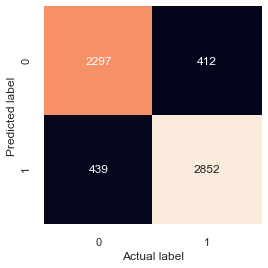

In [259]:
mat = confusion_matrix(y_test, y_hat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual label')
plt.ylabel('Predicted label');

### 1.3. Mean Absolute Error of the Random Forest Model

The below shows that the Mean Absolute Error is 0.14 degrees. This is very minimal and shows a good performance.

In [260]:
# Use the forest's predict method on the test data
predictions = RFModel.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (MAE)
print('Mean Absolute Error of the Random Forest model:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error of the Random Forest model: 0.14 degrees.


### 1.4. AUC-ROC curve of the Random Forest Model

In the below section, the AUC-ROC curve is generated. First, the Random Forest model is used to predict probabilities. Different thresholds are applied by the roc_curve function on these probabilities, then the ROC curve is generated, and AUC highlighted in the display.

In [261]:
# predict probabilities
pred_prob = RFModel.predict_proba(X_test)

In [262]:
# roc curve for models
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1], pos_label=1)

The AUC score of the Random Forest model can be noticed at 0.858and it is show bellow.

In [263]:
# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print('AUC Score for the model trained on the whole dataset:', auc_score)

AUC Score for the model trained on the whole dataset: 0.8582913862730764


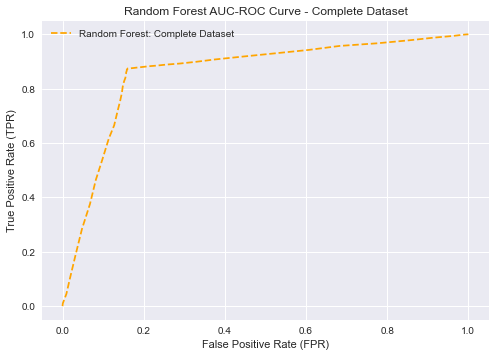

In [264]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Random Forest: Complete Dataset')

# title
plt.title('Random Forest AUC-ROC Curve - Complete Dataset')

# x label
plt.xlabel('False Positive Rate (FPR)')

# y label
plt.ylabel('True Positive Rate (TPR)')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### 1.5. Feature Importance in the Random Forest model

The below code compute the importance of each feature used as input into the Random Forest model. The graph display the weight of each feature in the model. It can be noticed that three features have a more important weight (i.e. Average Account Balance Before Call, Average Call Duration and Average Call Count).

In [265]:
# Extract feature importance from the fitted model
feature_importance = RFModel.feature_importances_

#Generate a summary of the feature importance
for i,v in enumerate(feature_importance):
    print('Feature: %s (Weight: %.5f)' % (feature_list[i],v))

Feature: AVG_CALL_COUNT (Weight: 0.17862)
Feature: AVG_CALL_DUR (Weight: 0.28590)
Feature: AVG_ACCT_BAL_BEFORE_CALL (Weight: 0.34019)
Feature: AVG_RECHARGE_AMT (Weight: 0.09715)
Feature: AVG_ACCT_BAL_BEFORE_RECHARGE (Weight: 0.09814)


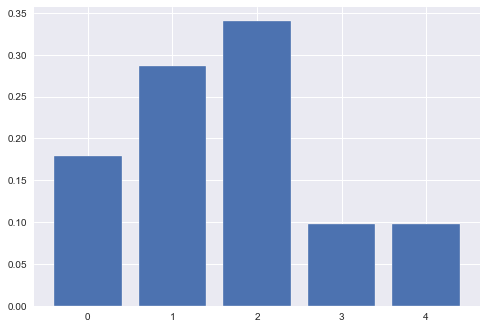

In [266]:
# plot feature importance
pyplot.bar([x for x in range(len(feature_importance))], feature_importance)
pyplot.show()

In [267]:
for i,v in enumerate(feature_importance):
    print('%0d : %s' % (i, feature_list[i]))

0 : AVG_CALL_COUNT
1 : AVG_CALL_DUR
2 : AVG_ACCT_BAL_BEFORE_CALL
3 : AVG_RECHARGE_AMT
4 : AVG_ACCT_BAL_BEFORE_RECHARGE


## 2. Training the RF model on Subgroup 1 Dataset

Participants in the first subgroup of 10,000 subscribers were offered a package that provides 3 times more minutes compared to the average monthly minutes used by the participant to call a specific called party number. Out of this subgroup 6,107 participants equivalent to 61% of the participants in the subgroup accepted the package that cost 25% higher than the average they spent on calling the same called party number monthly in the previous 6 months considered in the research. The total spending of all participants in this subgroup is 2,212,635 RWF which means an average of 362.31 RWF per participant.

In this section, the model is trained and evaluated using only Subgroup 1 dataset.

In [268]:
# Extract data related to subscribers in subgroup 1
data_grp_1 = data[data['SUBGROUP'] == 1]

X_grp_1 = data_grp_1.drop('LABEL', axis = 1)\
    .drop('SUBGROUP', axis = 1)\
    .drop('AVG_SPENDING', axis = 1)\
    .drop('TARGET_SPENDING', axis = 1)

y_grp_1 = np.array(data_grp_1['LABEL'])
X_grp_1 = np.array(X_grp_1)

In [269]:
# Basic statistics of the dataset
data_grp_1.describe()

,ROW_NUMBER,SUBGROUP,AVG_SPENDING,TARGET_SPENDING,AVG_CALL_COUNT,AVG_CALL_DUR,AVG_ACCT_BAL_BEFORE_CALL,AVG_RECHARGE_AMT,AVG_ACCT_BAL_BEFORE_RECHARGE,LABEL
count,10000.00000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14962.91810,1.0,240.816203,301.029500,14.395480,121.403099,188.085895,1824.114785,35.304699,0.610700
std,8679.78578,0.0,124.800131,156.002615,8.372766,103.825803,104.530199,1023.856148,20.499452,0.487616
min,2.00000,1.0,3.280000,4.000000,1.010000,2.050000,5.000000,50.450000,0.000000,0.000000
25%,7483.75000,1.0,136.855000,171.000000,7.800000,47.175000,96.450000,929.612500,17.555000,0.000000
50%,14974.00000,1.0,238.230000,298.000000,12.940000,91.300000,190.810000,1816.045000,35.190000,1.000000
75%,22541.25000,1.0,343.710000,430.000000,19.420000,166.342500,278.882500,2708.607500,53.002500,1.000000
max,30000.00000,1.0,573.900000,717.000000,59.140000,927.350000,363.990000,3600.860000,70.990000,1.000000


In [270]:
# Define the model for subgroup 1
RFModel1 = RandomForestClassifier(random_state=42, n_estimators=50)

#Evaluate the model with 10-folds Cross Validation
cross_valid_grp_1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_grp_1 = cross_val_score(RFModel1, X_grp_1, y_grp_1, scoring='accuracy', cv=cross_valid_grp_1, n_jobs=-1, error_score='raise')

# report performance on subgroup 1
print('Accuracy for Subgroup 1: %.3f (%.3f)' % (mean(n_scores_grp_1), std(n_scores_grp_1)))

Accuracy for Subgroup 1: 0.858 (0.012)


In [271]:
# Split the data into training and testing datasets, using the 80:20 ratio to keep 20% for testing
X_train_grp_1, X_test_grp_1, y_train_grp_1, y_test_grp_1 = train_test_split(X_grp_1, y_grp_1, test_size = 0.2, random_state = 42)

# Fitting the RF Model on the training dataset
RFModel1.fit(X_train_grp_1, y_train_grp_1)

#Generate the classification report for subgroup 1
y_hat_grp_1 = RFModel1.predict(X_test_grp_1)
print(metrics.classification_report(y_hat_grp_1, y_test_grp_1))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       822
           1       0.86      0.90      0.88      1178

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



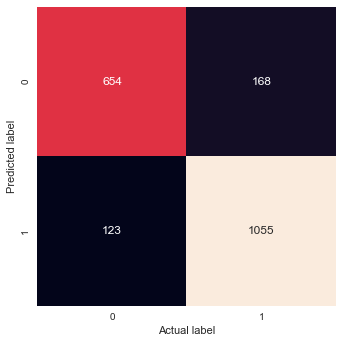

In [272]:
mat_grp_1 = confusion_matrix(y_test_grp_1, y_hat_grp_1)
sns.heatmap(mat_grp_1.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual label')
plt.ylabel('Predicted label');

In [273]:
# Use the forest's predict method on the test data
predictions_grp_1 = RFModel1.predict(X_test_grp_1)
# Calculate the absolute errors
errors_grp_1 = abs(predictions_grp_1 - y_test_grp_1)
# Print out the mean absolute error (MAE)
print('Mean Absolute Error for Subgroup 1:', round(np.mean(errors_grp_1), 2), 'degrees.')

Mean Absolute Error for Subgroup 1: 0.15 degrees.


In [274]:
# Generate AUC-ROC curve
# predict probabilities
pred_prob_grp_1 = RFModel1.predict_proba(X_test_grp_1)

# roc curve for models
fpr_grp_1, tpr_grp_1, thresholds_grp_1 = roc_curve(y_test_grp_1, pred_prob_grp_1[:,1], pos_label=1)

# auc scores
auc_score_grp_1 = roc_auc_score(y_test_grp_1, pred_prob_grp_1[:,1])
print('AUC Score for the model trained on Subgroup 1:', auc_score_grp_1)

AUC Score for the model trained on Subgroup 1: 0.8596826589467637


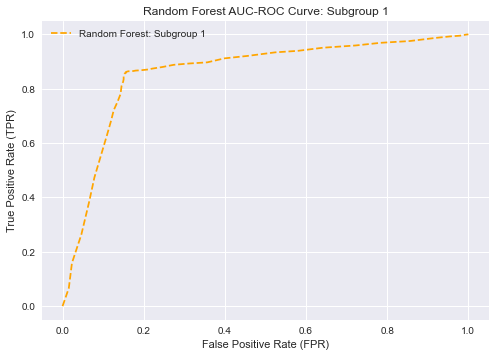

In [275]:
# Plotting the AUC-ROC Curve
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_grp_1, tpr_grp_1, linestyle='--',color='orange', label='Random Forest: Subgroup 1')

# title
plt.title('Random Forest AUC-ROC Curve: Subgroup 1')

# x label
plt.xlabel('False Positive Rate (FPR)')

# y label
plt.ylabel('True Positive Rate (TPR)')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## 3. Training the RF model on Subgroup 2 Dataset

Participants in the first subgroup of 10,000 subscribers were offered a package that provides 3 times more minutes compared to the average monthly minutes used by the participant to call a specific called party number. Out of this subgroup 6,107 participants equivalent to 61% of the participants in the subgroup accepted the package that cost 25% higher than the average they spent on calling the same called party number monthly in the previous 6 months considered in the research. The total spending of all participants in this subgroup is 2,212,635 RWF which means an average of 362.31 RWF per participant.

In this section, the model is trained and evaluated using only Subgroup 2 dataset.

In [276]:
# Extract data related to subscribers in Subgroup 2
data_grp_2 = data[data['SUBGROUP'] == 2]

X_grp_2 = data_grp_2.drop('LABEL', axis = 1)\
    .drop('SUBGROUP', axis = 1)\
    .drop('AVG_SPENDING', axis = 1)\
    .drop('TARGET_SPENDING', axis = 1)

y_grp_2 = np.array(data_grp_2['LABEL'])
X_grp_2 = np.array(X_grp_2)

In [277]:
# Basic statistics of the dataset
data_grp_2.describe()

,ROW_NUMBER,SUBGROUP,AVG_SPENDING,TARGET_SPENDING,AVG_CALL_COUNT,AVG_CALL_DUR,AVG_ACCT_BAL_BEFORE_CALL,AVG_RECHARGE_AMT,AVG_ACCT_BAL_BEFORE_RECHARGE,LABEL
count,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15016.275600,2.0,239.913711,359.871200,14.373764,116.289331,184.649456,1821.895974,35.550932,0.552800
std,8642.967312,0.0,124.664192,186.994925,8.314793,98.550522,103.353585,1030.823112,20.427021,0.497229
min,1.000000,2.0,2.850000,4.000000,1.000000,2.030000,5.100000,50.250000,0.000000,0.000000
25%,7538.500000,2.0,136.147500,204.000000,7.957500,45.755000,94.557500,926.497500,17.760000,0.000000
50%,14973.500000,2.0,233.390000,350.000000,12.940000,88.730000,185.705000,1840.130000,35.380000,1.000000
75%,22448.750000,2.0,343.932500,516.000000,19.172500,158.515000,274.582500,2722.737500,53.140000,1.000000
max,29999.000000,2.0,585.500000,878.000000,58.100000,933.960000,363.990000,3600.920000,70.990000,1.000000


In [278]:
# Define the model for Subgroup 2
RFModel2 = RandomForestClassifier(random_state=42, n_estimators=50)

#Evaluate the model with 10-folds Cross Validation
cross_valid_grp_2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_grp_2 = cross_val_score(RFModel2, X_grp_2, y_grp_2, scoring='accuracy', cv=cross_valid_grp_2, n_jobs=-1, error_score='raise')

# report performance on Subgroup 2
print('Accuracy for Subgroup 2: %.3f (%.3f)' % (mean(n_scores_grp_2), std(n_scores_grp_2)))

Accuracy for Subgroup 2: 0.857 (0.009)


In [279]:
# Split the data into training and testing datasets, using the 80:20 ratio to keep 20% for testing
X_train_grp_2, X_test_grp_2, y_train_grp_2, y_test_grp_2 = train_test_split(X_grp_2, y_grp_2, test_size = 0.2, random_state = 42)

# Fitting the RF Model on the training dataset
RFModel2.fit(X_train_grp_2, y_train_grp_2)

#Generate the classification report for Subgroup 2
y_hat_grp_2 = RFModel2.predict(X_test_grp_2)
print(metrics.classification_report(y_hat_grp_2, y_test_grp_2))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       900
           1       0.86      0.87      0.87      1100

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



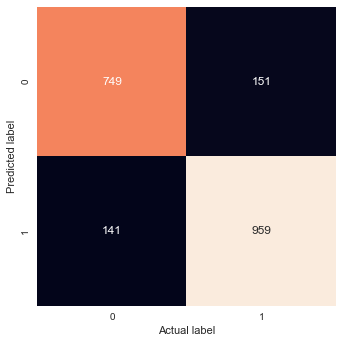

In [280]:
mat_grp_2 = confusion_matrix(y_test_grp_2, y_hat_grp_2)
sns.heatmap(mat_grp_2.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual label')
plt.ylabel('Predicted label');

In [281]:
# Use the forest's predict method on the test data
predictions_grp_2 = RFModel2.predict(X_test_grp_2)
# Calculate the absolute errors
errors_grp_2 = abs(predictions_grp_2 - y_test_grp_2)
# Print out the mean absolute error (MAE)
print('Mean Absolute Error for Subgroup 2:', round(np.mean(errors_grp_2), 2), 'degrees.')

Mean Absolute Error for Subgroup 2: 0.15 degrees.


In [282]:
# Generate AUC-ROC curve
# predict probabilities
pred_prob_grp_2 = RFModel2.predict_proba(X_test_grp_2)

# roc curve for models
fpr_grp_2, tpr_grp_2, thresholds_grp_2 = roc_curve(y_test_grp_2, pred_prob_grp_2[:,1], pos_label=1)

# auc scores
auc_score_grp_2 = roc_auc_score(y_test_grp_2, pred_prob_grp_2[:,1])
print('AUC Score for the model trained on Subgroup 2:', auc_score_grp_2)

AUC Score for the model trained on Subgroup 2: 0.8609358234639134


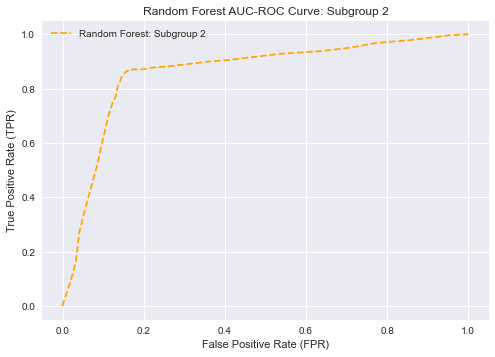

In [283]:
# Plotting the AUC-ROC Curve
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_grp_2, tpr_grp_2, linestyle='--',color='orange', label='Random Forest: Subgroup 2')

# title
plt.title('Random Forest AUC-ROC Curve: Subgroup 2')

# x label
plt.xlabel('False Positive Rate (FPR)')

# y label
plt.ylabel('True Positive Rate (TPR)')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## 4. Training the RF model on Subgroup 3 Dataset

Participants in the first subgroup of 10,000 subscribers were offered a package that provides 3 times more minutes compared to the average monthly minutes used by the participant to call a specific called party number. Out of this subgroup 6,107 participants equivalent to 61% of the participants in the subgroup accepted the package that cost 25% higher than the average they spent on calling the same called party number monthly in the previous 6 months considered in the research. The total spending of all participants in this subgroup is 2,212,635 RWF which means an average of 362.31 RWF per participant.

In this section, the model is trained and evaluated using only Subgroup 3 dataset.

In [284]:
# Extract data related to subscribers in Subgroup 3
data_grp_3 = data[data['SUBGROUP'] == 3]

X_grp_3 = data_grp_3.drop('LABEL', axis = 1)\
    .drop('SUBGROUP', axis = 1)\
    .drop('AVG_SPENDING', axis = 1)\
    .drop('TARGET_SPENDING', axis = 1)

y_grp_3 = np.array(data_grp_3['LABEL'])
X_grp_3 = np.array(X_grp_3)

In [285]:
# Basic statistics of the dataset
data_grp_3.describe()

,ROW_NUMBER,SUBGROUP,AVG_SPENDING,TARGET_SPENDING,AVG_CALL_COUNT,AVG_CALL_DUR,AVG_ACCT_BAL_BEFORE_CALL,AVG_RECHARGE_AMT,AVG_ACCT_BAL_BEFORE_RECHARGE,LABEL
count,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15022.306300,3.0,239.451829,478.916400,14.029388,112.893521,180.258978,1836.738922,35.536471,0.481900
std,8659.145446,0.0,126.153060,252.308337,8.085590,100.107876,102.632295,1028.499448,20.572801,0.499697
min,5.000000,3.0,3.220000,6.000000,1.020000,2.090000,5.060000,51.470000,0.000000,0.000000
25%,7497.000000,3.0,133.435000,267.000000,7.767500,44.160000,92.562500,953.110000,17.827500,0.000000
50%,15063.500000,3.0,235.010000,470.000000,12.665000,84.665000,177.995000,1839.225000,35.505000,0.000000
75%,22514.750000,3.0,342.365000,685.000000,18.720000,147.472500,267.505000,2729.775000,53.532500,1.000000
max,29985.000000,3.0,583.430000,1167.000000,57.530000,853.660000,363.990000,3600.940000,70.990000,1.000000


In [286]:
# Define the model for Subgroup 3
RFModel3 = RandomForestClassifier(random_state=42, n_estimators=50)

#Evaluate the model with 10-folds Cross Validation
cross_valid_grp_3 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_grp_3 = cross_val_score(RFModel3, X_grp_3, y_grp_3, scoring='accuracy', cv=cross_valid_grp_3, n_jobs=-1, error_score='raise')

# report performance on Subgroup 3
print('Accuracy for Subgroup 3: %.3f (%.3f)' % (mean(n_scores_grp_3), std(n_scores_grp_3)))

Accuracy for Subgroup 3: 0.860 (0.009)


In [287]:
# Split the data into training and testing datasets, using the 80:20 ratio to keep 20% for testing
X_train_grp_3, X_test_grp_3, y_train_grp_3, y_test_grp_3 = train_test_split(X_grp_3, y_grp_3, test_size = 0.2, random_state = 42)

# Fitting the RF Model on the training dataset
RFModel3.fit(X_train_grp_3, y_train_grp_3)

#Generate the classification report for Subgroup 3
y_hat_grp_3 = RFModel3.predict(X_test_grp_3)
print(metrics.classification_report(y_hat_grp_3, y_test_grp_3))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       990
           1       0.88      0.83      0.85      1010

    accuracy                           0.85      2000
   macro avg       0.86      0.86      0.85      2000
weighted avg       0.86      0.85      0.85      2000



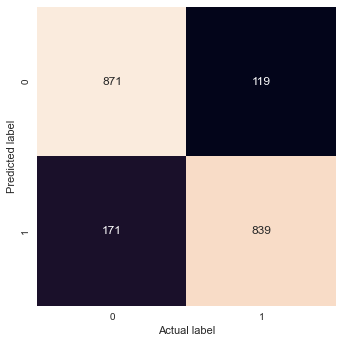

In [288]:
mat_grp_3 = confusion_matrix(y_test_grp_3, y_hat_grp_3)
sns.heatmap(mat_grp_3.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual label')
plt.ylabel('Predicted label');

In [289]:
# Use the forest's predict method on the test data
predictions_grp_3 = RFModel3.predict(X_test_grp_3)
# Calculate the absolute errors
errors_grp_3 = abs(predictions_grp_3 - y_test_grp_3)
# Print out the mean absolute error (MAE)
print('Mean Absolute Error for Subgroup 3:', round(np.mean(errors_grp_3), 2), 'degrees.')

Mean Absolute Error for Subgroup 3: 0.14 degrees.


In [290]:
# Generate AUC-ROC curve
# predict probabilities
pred_prob_grp_3 = RFModel3.predict_proba(X_test_grp_3)

# roc curve for models
fpr_grp_3, tpr_grp_3, thresholds_grp_3 = roc_curve(y_test_grp_3, pred_prob_grp_3[:,1], pos_label=1)

# auc scores
auc_score_grp_3 = roc_auc_score(y_test_grp_3, pred_prob_grp_3[:,1])
print('AUC Score for the model trained on Subgroup 3:', auc_score_grp_3)

AUC Score for the model trained on Subgroup 3: 0.858306552759067


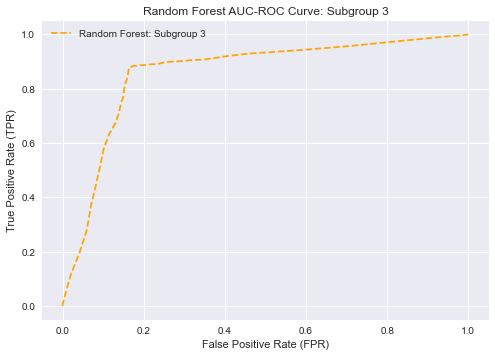

In [291]:
# Plotting the AUC-ROC Curve
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_grp_3, tpr_grp_3, linestyle='--',color='orange', label='Random Forest: Subgroup 3')

# title
plt.title('Random Forest AUC-ROC Curve: Subgroup 3')

# x label
plt.xlabel('False Positive Rate (FPR)')

# y label
plt.ylabel('True Positive Rate (TPR)')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## 5. Conclusion

In general the Random Forest model is exhibiting good prediction performance with an AUC value of 0.859. This means that there is a 85.9% chance that the model will be able to distinguish between subscribers who will purchase the discounted package and those that will not.